In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import ogb

In [3]:
import torch
from torch_geometric.data import Data, DataLoader

In [4]:
cwd = os.getcwd()
print(cwd)

/cluster/home/skyriakos/chemprop_run/git/notebooks


In [5]:
os.chdir('..')
import deepadr
from deepadr.dataset import *
from deepadr.utilities import *
from deepadr.run_workflow import *
from deepadr.chemfeatures import *
from deepadr.model_gnn import GCN as testGCN
os.chdir(cwd)

In [6]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [7]:
# from tdc.single_pred import Tox
# from tdc.multi_pred import DDI
from tdc.multi_pred import DrugSyn
# data = DrugSyn(name = 'OncoPolyPharmacology')



In [8]:
rawdata_dir = '../data/raw/'
processed_dir = '../data/processed/'
up_dir = '..'

In [9]:
report_available_cuda_devices()

number of GPUs available: 8
cuda:0, name:GeForce GTX 1080 Ti
total memory available: 10.91650390625 GB
total memory allocated on device: 0.0 GB
max memory allocated on device: 0.0 GB
total memory cached on device: 0.0 GB
max memory cached  on device: 0.0 GB

cuda:1, name:GeForce GTX 1080 Ti
total memory available: 10.91650390625 GB
total memory allocated on device: 0.0 GB
max memory allocated on device: 0.0 GB
total memory cached on device: 0.0 GB
max memory cached  on device: 0.0 GB

cuda:2, name:GeForce GTX 1080 Ti
total memory available: 10.91650390625 GB
total memory allocated on device: 0.0 GB
max memory allocated on device: 0.0 GB
total memory cached on device: 0.0 GB
max memory cached  on device: 0.0 GB

cuda:3, name:GeForce GTX 1080 Ti
total memory available: 10.91650390625 GB
total memory allocated on device: 0.0 GB
max memory allocated on device: 0.0 GB
total memory cached on device: 0.0 GB
max memory cached  on device: 0.0 GB

cuda:4, name:GeForce GTX 1080 Ti
total memory av

In [10]:
n_gpu = torch.cuda.device_count()
n_gpu

8

### Preparing dataset 

In [11]:
# TDC Tox
DSdataset_name = 'OncoPolyPharmacology' #'DrugComb'

#fname_suffix = ds_config["fname_suffix"]
similarity_types = ['chem']
kernel_option = 'sqeuclidean'
data_fname = 'data_v1'
# interact_matfname = ds_config["interact_matfname"]
# exp_iden = 'simtypeall'
# ddi_interaction_labels_pth = ds_config["ddi_interaction_labels_pth"]

# up_dir, processed_dir, DSdataset_name, data_fname

In [12]:
targetdata_dir = create_directory(os.path.join(processed_dir, DSdataset_name, data_fname))
targetdata_dir_raw = create_directory(os.path.join(targetdata_dir, "raw"))
targetdata_dir_processed = create_directory(os.path.join(targetdata_dir, "processed"))
# ReaderWriter.dump_data(dpartitions, os.path.join(targetdata_dir, 'data_partitions.pkl'))

path_current_dir /cluster/home/skyriakos/chemprop_run/git/deepadr
path_current_dir /cluster/home/skyriakos/chemprop_run/git/deepadr
path_current_dir /cluster/home/skyriakos/chemprop_run/git/deepadr


In [13]:
targetdata_dir

'/cluster/home/skyriakos/chemprop_run/git/data/processed/OncoPolyPharmacology/data_v1'

In [14]:
# data = DDI(name = DSdataset_name).get_data(format = 'df')
data = DrugSyn(name = DSdataset_name).get_data(format = 'df')


Found local copy...
Loading...
Done!


In [15]:
# from tdc.utils import get_label_map
# get_label_map(name = 'DrugBank', task = 'DDI')


In [16]:
# data = Tox(name = DSdataset_name).get_data(format = 'df')
# smiles, labels = data['Drug'], data['Y']

In [17]:
data

,Drug1_ID,Drug2_ID,Cell_Line_ID,Y,Cell_Line,Drug1,Drug2
0,5-FU,ABT-888,A2058,7.693530,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
1,5-FU,ABT-888,A2780,7.778053,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
2,5-FU,ABT-888,A375,-1.198505,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
3,5-FU,ABT-888,A427,2.595684,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
4,5-FU,ABT-888,CAOV3,-5.139971,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
...,...,...,...,...,...,...,...
23047,ZOLINZA,TOPOTECAN,UACC62,10.223066,"[-0.18899497244411118, -0.19839747536407973, -...",O=C(CCCCCCC(=O)Nc1ccccc1)NO,CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O...
23048,ZOLINZA,TOPOTECAN,UWB1289BRCA1,20.551627,"[-0.18899497244411118, -0.19839747536407973, -...",O=C(CCCCCCC(=O)Nc1ccccc1)NO,CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O...
23049,ZOLINZA,TOPOTECAN,UWB1289,12.190316,"[-0.18899497244411118, -0.19839747536407973, -...",O=C(CCCCCCC(=O)Nc1ccccc1)NO,CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O...
23050,ZOLINZA,TOPOTECAN,VCAP,23.438547,"[-0.18899497244411118, -0.19839747536407973, -...",O=C(CCCCCCC(=O)Nc1ccccc1)NO,CCC1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C)c(O...


In [18]:
data.columns

Index(['Drug1_ID', 'Drug2_ID', 'Cell_Line_ID', 'Y', 'Cell_Line', 'Drug1',
       'Drug2'],
      dtype='object')

In [19]:
# datashort = data[['Drug1_ID', 'Drug2_ID', 'Y']]
# datashort.Y = 1
# datashort = datashort[~datashort.duplicated()]
# datashort

In [20]:
uniq_data = ddi_dataframe_to_unique_drugs(data)
# uniq_data

In [21]:
uniq_data['Mol'] = [smiles_to_mol(smiles) for smiles in uniq_data.Drug]

In [22]:
uniq_mol = uniq_data[~uniq_data.Mol.isnull()]
# uniq_mol['Data'] = [mol_to_graph_data_obj_simple(mol) for mol in uniq_mol.Mol]
uniq_mol['DataOGB'] = [smiles_to_graph_data_obj_ogb(smiles) for smiles in uniq_mol.Drug]
uniq_mol = uniq_mol.set_index("Drug_ID")
uniq_mol

,Drug,Mol,DataOGB
Drug_ID,,,
5-FU,O=c1[nH]cc(F)c(=O)[nH]1,<rdkit.Chem.rdchem.Mol object at 0x2b888ea7e1c0>,"[(edge_attr, [tensor([1, 0, 1]), tensor([1, 0,..."
ABT-888,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1,<rdkit.Chem.rdchem.Mol object at 0x2b888ea7e040>,"[(edge_attr, [tensor([0, 0, 0]), tensor([0, 0,..."
AZD1775,C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-...,<rdkit.Chem.rdchem.Mol object at 0x2b888ea7e2e0>,"[(edge_attr, [tensor([1, 0, 0]), tensor([1, 0,..."
BEZ-235,Cn1c(=O)n(-c2ccc(C(C)(C)C#N)cc2)c2c3cc(-c4cnc5...,<rdkit.Chem.rdchem.Mol object at 0x2b888ea7e340>,"[(edge_attr, [tensor([0, 0, 0]), tensor([0, 0,..."
BORTEZOMIB,CC(C)CC(NC(=O)C(Cc1ccccc1)NC(=O)c1cnccn1)B(O)O,<rdkit.Chem.rdchem.Mol object at 0x2b888ea7e3a0>,"[(edge_attr, [tensor([0, 0, 0]), tensor([0, 0,..."
CARBOPLATIN,N.N.O=C(O)C1(C(=O)O)CCC1.[Pt],<rdkit.Chem.rdchem.Mol object at 0x2b888ea7e400>,"[(edge_attr, [tensor([1, 0, 1]), tensor([1, 0,..."
CYCLOPHOSPHAMIDE,O=P1(N(CCCl)CCCl)NCCCO1,<rdkit.Chem.rdchem.Mol object at 0x2b888ea7e460>,"[(edge_attr, [tensor([1, 0, 0]), tensor([1, 0,..."
DASATINIB,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,<rdkit.Chem.rdchem.Mol object at 0x2b888ea7e4c0>,"[(edge_attr, [tensor([0, 0, 0]), tensor([0, 0,..."
DEXAMETHASONE,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O...,<rdkit.Chem.rdchem.Mol object at 0x2b888ea7e520>,"[(edge_attr, [tensor([0, 0, 0]), tensor([0, 0,..."


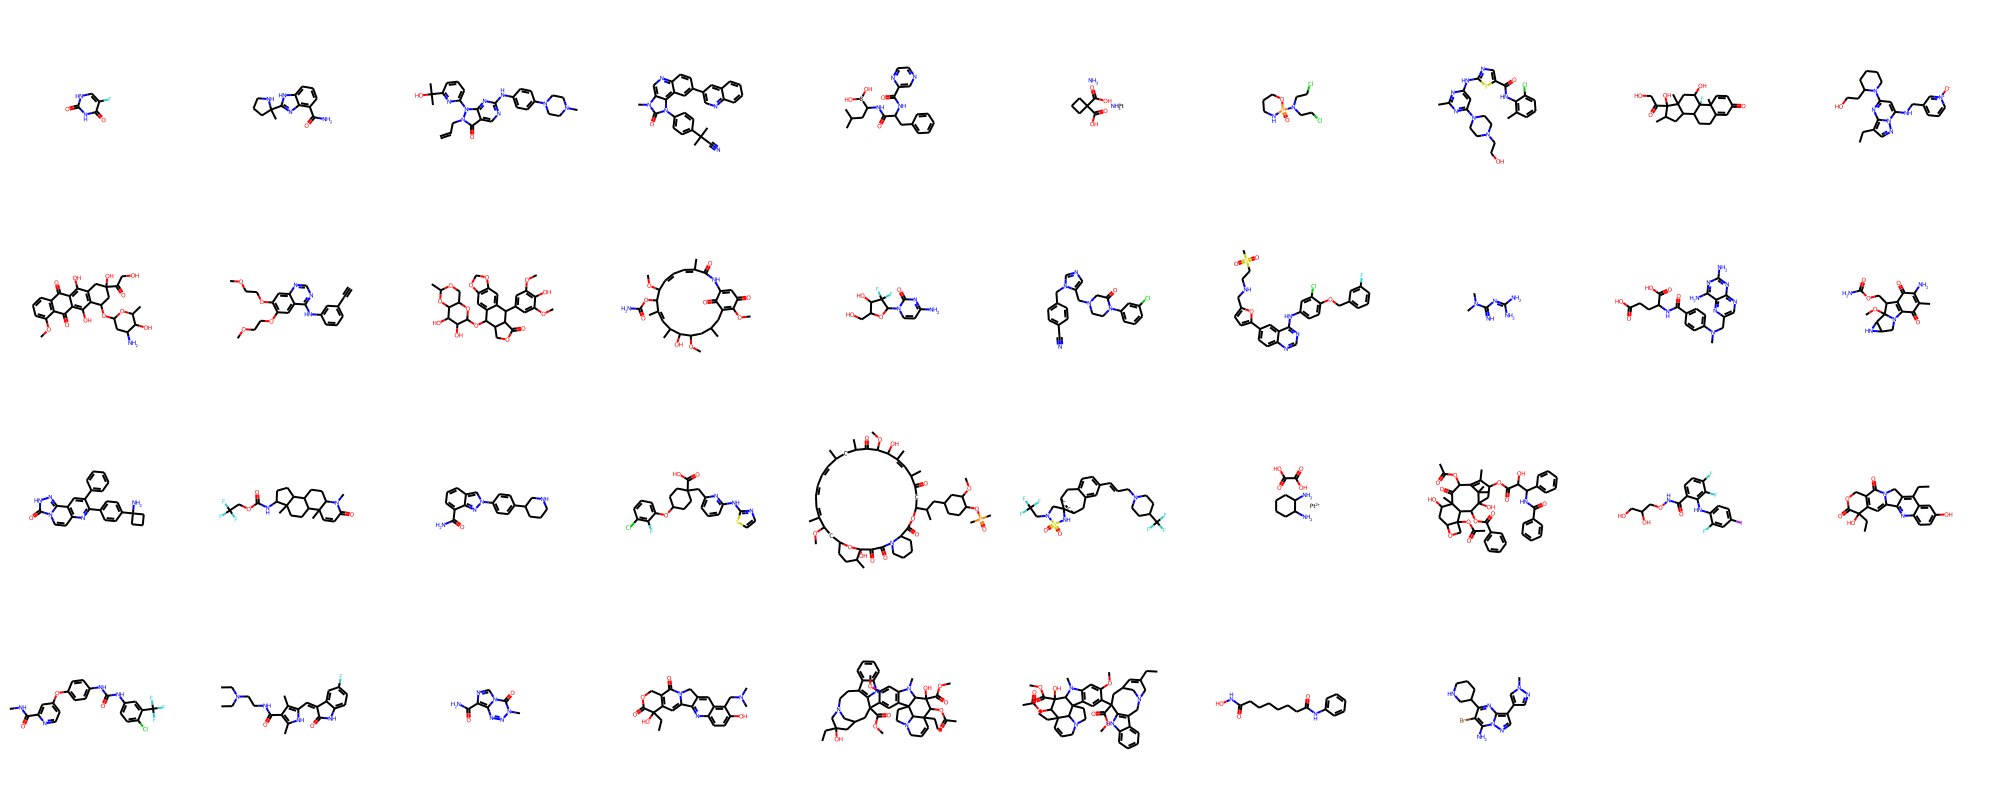

In [23]:
Draw.MolsToGridImage(uniq_mol.Mol.head(40), molsPerRow=10)

In [24]:
# num_drugs = len(uniq_mol)
# int((num_drugs * (num_drugs-1))/2)

In [25]:
# uniq_mol.iloc[0].Data

In [26]:
uniq_mol.iloc[0].DataOGB

Data(edge_attr=[18, 3], edge_index=[2, 18], x=[9, 9])

In [27]:
# zhang_labels = pd.read_csv(rawdata_dir + '/DS1/drug_drug_matrix_wids.csv').set_index('Unnamed: 0')
# y_df = zhang_labels

In [28]:
# %%time

# y_df = ReaderWriter.read_or_dump_data(file_name=norm_join_paths(targetdata_dir_raw, 'y_df.pkl'),
#                                      data_gen_fun = generate_labels_df,
#                                      data_gen_params=(uniq_mol, datashort))

In [29]:
# y_df = generate_labels_df(uniq_mol, data)

# ReaderWriter.dump_data(y_df, os.path.join(targetdata_dir_raw, 'y_df.pkl'))

#y_df = ReaderWriter.read_data(os.path.join(targetdata_dir_raw, 'y_df.pkl'))

In [30]:
# y_df

In [31]:
# y_df[y_df > 0] = 1
# y_df

In [32]:
# y = get_y_from_interactionmat(y_df.to_numpy())
# len(y)

In [33]:
binary_Y_threshold = 30

In [34]:
y = data.Y.copy()
y

0         7.693530
1         7.778053
2        -1.198505
3         2.595684
4        -5.139971
           ...    
23047    10.223066
23048    20.551627
23049    12.190316
23050    23.438547
23051    12.223791
Name: Y, Length: 23052, dtype: float64

In [37]:
str(round((len(y[y>=binary_Y_threshold]) / len(y) *100), 2)) + "% positive labels"

'9.03% positive labels'

<AxesSubplot:xlabel='Y'>

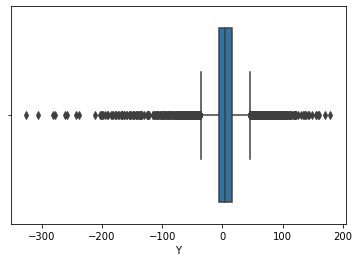

In [38]:
sns.boxplot(y)

In [39]:
positive_labels = y>=binary_Y_threshold
negative_labels = y<binary_Y_threshold

In [40]:
y[positive_labels] = 1
y[negative_labels] = 0
y = y.astype(int)
y

0        0
1        0
2        0
3        0
4        0
        ..
23047    0
23048    0
23049    0
23050    0
23051    0
Name: Y, Length: 23052, dtype: int64

In [41]:
y.values

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
ReaderWriter.dump_data(y.values, os.path.join(targetdata_dir_raw, 'y.pkl'))

In [43]:
y_weights = compute_class_weights(torch.tensor(y))
y_weights

array([0.54961614, 5.53868333])

In [44]:
ReaderWriter.dump_data(y_weights, os.path.join(targetdata_dir_raw, 'y_weights.pkl'))

In [45]:
expression = data["Cell_Line"].values
expression

array([array([ 5.29114604,  5.04038672,  5.29114604, ...,  0.69189136,
              -0.9825026 , -0.36456493])                              ,
       array([ 5.29114604,  5.04038672,  5.29114604, ...,  1.13929333,
              -1.07020346, -0.42541529])                              ,
       array([ 5.29114604,  5.04038672,  5.29114604, ..., -0.42313671,
              -1.06511996, -1.00249025])                              ,
       ...,
       array([-0.18899497, -0.19839748, -0.18899497, ..., -0.37422676,
              -0.07355896, -0.21785647])                              ,
       array([-0.18899497, -0.19839748, -0.18899497, ..., -0.43659348,
               1.20746417, -1.52213641])                              ,
       array([-0.18899497, -0.19839748, -0.18899497, ..., -1.7055414 ,
              -0.71434724,  0.63526581])                              ],
      dtype=object)

In [46]:
ReaderWriter.dump_data(expression, os.path.join(targetdata_dir_raw, 'expression.pkl'))

In [47]:
# report_label_distrib(y)

In [48]:
# # pairs = list(itertools.combinations(uniq_mol.Drug_ID, 2))
# pairs = construct_sampleid_ddipairs(y_df.to_numpy())
# len(pairs)

In [49]:
pairs = {i:(row.Drug1_ID, row.Drug2_ID) for i, row in data.iterrows()}
len(pairs)

23052

In [50]:
pairs

{0: ('5-FU', 'ABT-888'),
 1: ('5-FU', 'ABT-888'),
 2: ('5-FU', 'ABT-888'),
 3: ('5-FU', 'ABT-888'),
 4: ('5-FU', 'ABT-888'),
 5: ('5-FU', 'ABT-888'),
 6: ('5-FU', 'ABT-888'),
 7: ('5-FU', 'ABT-888'),
 8: ('5-FU', 'ABT-888'),
 9: ('5-FU', 'ABT-888'),
 10: ('5-FU', 'ABT-888'),
 11: ('5-FU', 'ABT-888'),
 12: ('5-FU', 'ABT-888'),
 13: ('5-FU', 'ABT-888'),
 14: ('5-FU', 'ABT-888'),
 15: ('5-FU', 'ABT-888'),
 16: ('5-FU', 'ABT-888'),
 17: ('5-FU', 'ABT-888'),
 18: ('5-FU', 'ABT-888'),
 19: ('5-FU', 'ABT-888'),
 20: ('5-FU', 'ABT-888'),
 21: ('5-FU', 'ABT-888'),
 22: ('5-FU', 'ABT-888'),
 23: ('5-FU', 'ABT-888'),
 24: ('5-FU', 'ABT-888'),
 25: ('5-FU', 'ABT-888'),
 26: ('5-FU', 'ABT-888'),
 27: ('5-FU', 'ABT-888'),
 28: ('5-FU', 'ABT-888'),
 29: ('5-FU', 'ABT-888'),
 30: ('5-FU', 'ABT-888'),
 31: ('5-FU', 'ABT-888'),
 32: ('5-FU', 'ABT-888'),
 33: ('5-FU', 'ABT-888'),
 34: ('5-FU', 'ABT-888'),
 35: ('5-FU', 'ABT-888'),
 36: ('5-FU', 'ABT-888'),
 37: ('5-FU', 'ABT-888'),
 38: ('5-FU', 'ABT-888

In [51]:
# pairs_sub = {k: pairs[k] for k in range(10)}
# pairs_sub

In [52]:
%%time

X = ReaderWriter.read_or_dump_data(file_name=norm_join_paths(targetdata_dir_raw, 'X.pkl'),
                              data_gen_fun=get_X_all_pairdata_synergy,
                              data_gen_params=(uniq_mol, pairs, "DataOGB"))

CPU times: user 217 ms, sys: 50.7 ms, total: 267 ms
Wall time: 267 ms


In [53]:
# X = get_X_all_pairdata(uniq_mol, pairs)

# ReaderWriter.dump_data(X, os.path.join(targetdata_dir_raw, 'X.pkl'))

#X = ReaderWriter.read_data(os.path.join(targetdata_dir_raw, 'X.pkl'))


In [54]:
X

{0: PairData(edge_attr_a=[18, 3], edge_attr_b=[40, 3], edge_index_a=[2, 18], edge_index_b=[2, 40], x_a=[9, 9], x_b=[18, 9]),
 1: PairData(edge_attr_a=[18, 3], edge_attr_b=[40, 3], edge_index_a=[2, 18], edge_index_b=[2, 40], x_a=[9, 9], x_b=[18, 9]),
 2: PairData(edge_attr_a=[18, 3], edge_attr_b=[40, 3], edge_index_a=[2, 18], edge_index_b=[2, 40], x_a=[9, 9], x_b=[18, 9]),
 3: PairData(edge_attr_a=[18, 3], edge_attr_b=[40, 3], edge_index_a=[2, 18], edge_index_b=[2, 40], x_a=[9, 9], x_b=[18, 9]),
 4: PairData(edge_attr_a=[18, 3], edge_attr_b=[40, 3], edge_index_a=[2, 18], edge_index_b=[2, 40], x_a=[9, 9], x_b=[18, 9]),
 5: PairData(edge_attr_a=[18, 3], edge_attr_b=[40, 3], edge_index_a=[2, 18], edge_index_b=[2, 40], x_a=[9, 9], x_b=[18, 9]),
 6: PairData(edge_attr_a=[18, 3], edge_attr_b=[40, 3], edge_index_a=[2, 18], edge_index_b=[2, 40], x_a=[9, 9], x_b=[18, 9]),
 7: PairData(edge_attr_a=[18, 3], edge_attr_b=[40, 3], edge_index_a=[2, 18], edge_index_b=[2, 40], x_a=[9, 9], x_b=[18, 9]),


In [55]:
targetdata_dir

'/cluster/home/skyriakos/chemprop_run/git/data/processed/OncoPolyPharmacology/data_v1'

In [56]:
%%time

dataset = MoleculeDataset(root=targetdata_dir, dataset='tdcSynergy')

CPU times: user 25.4 ms, sys: 1.71 s, total: 1.73 s
Wall time: 2.93 s


In [57]:
print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data0 = dataset[0]  # Get the first graph object.

# print()
# print(data)
# print('=============================================================')

# # Gather some statistics about the first graph.
# print(f'Number of nodes: {data.num_nodes}')
# print(f'Number of edges: {data.num_edges}')
# print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
# print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
# print(f'Contains self-loops: {data.contains_self_loops()}')
# print(f'Is undirected: {data.is_undirected()}')


Dataset: MoleculeDataset(23052):
Number of graphs: 23052
Number of features: 9
Number of classes: 2


In [58]:
data0

PairData(edge_attr_a=[18, 3], edge_attr_b=[40, 3], edge_index_a=[2, 18], edge_index_b=[2, 40], expression=[1, 8785], id=[1], x_a=[9, 9], x_b=[18, 9], y=[1])

In [59]:
data0.y

tensor([0.], dtype=torch.float64)

In [60]:
len(dataset)

23052

In [61]:
test_percent = 99
len_train = int((100-test_percent) * (len(dataset)/100))
len_train

230

In [62]:
torch.manual_seed(42)
dataset = dataset.shuffle()

In [63]:
train_dataset = dataset[:len_train]
test_dataset = dataset[len_train:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 230
Number of test graphs: 22822


In [64]:
train_dataset[3]

PairData(edge_attr_a=[64, 3], edge_attr_b=[64, 3], edge_index_a=[2, 64], edge_index_b=[2, 64], expression=[1, 8785], id=[1], x_a=[29, 9], x_b=[29, 9], y=[1])

In [65]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, follow_batch=['x_a', 'x_b'])
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, follow_batch=['x_a', 'x_b'])

In [66]:
# batch = next(iter(train_loader))
# print(batch)

In [45]:
uniq0 = uniq_mol.iloc[0].Data

In [46]:
uniq0.num_nodes

17

In [47]:
print(dataset.num_classes)

2


In [48]:
model_intermediate_dimension = 64

In [ ]:
model_name = "testGCN"

deepadr_model = testGCN(num_node_features=dataset.num_node_features, 
            hidden_channels=64, 
            num_classes=model_intermediate_dimension)
print(deepadr_model)

In [ ]:
deepadr_siamese = DeepAdr_SiameseTrf(input_dim=model_intermediate_dimension,
                                   dist='euclidean',
                                   num_classes=dataset.num_classes)

In [ ]:
models_param = list(deepadr_model.parameters()) + list(deepadr_siamese.parameters())

models = [(deepadr_model, model_name), (deepadr_siamese, f'{model_name}_Siamese')]
models

In [ ]:
# from IPython.display import Javascript
# display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

optimizer = torch.optim.Adam(models_param, lr=0.01)
# criterion = torch.nn.CrossEntropyLoss()

# loss_nlll = torch.nn.NLLLoss(weight=class_weights, reduction='mean')  # negative log likelihood loss
loss_nlll = torch.nn.NLLLoss(reduction='mean')  # negative log likelihood loss
loss_contrastive = ContrastiveLoss(0.5, reduction='mean')
fdtype = torch.float32
loss_w = 0.1

In [ ]:
def train():
    for m, m_name in models:
        m.train()

        #            for i_batch, samples_batch in enumerate(data_loader):

#     for data in train_loader:  # Iterate in batches over the training dataset.
    for i_batch, samples_batch in enumerate(train_loader):
        print("running batch:", i_batch)
        z_a = deepadr_model(samples_batch.x_a, samples_batch.edge_index_a, samples_batch.x_a_batch)
        z_b = deepadr_model(samples_batch.x_b, samples_batch.edge_index_b, samples_batch.x_b_batch)
        logsoftmax_scores, dist = deepadr_siamese(z_a, z_b)
#         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
#         loss = criterion(out, samples_batch.y)  # Compute the loss.
        cl = loss_nlll(logsoftmax_scores, samples_batch.y)            
        dl = loss_contrastive(dist.reshape(-1), samples_batch.y.type(fdtype))          
        loss = loss_w*cl + (1-loss_w)*dl
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

def test(loader):
    for m, m_name in models:
        m.eval()

    correct = 0
#     for data in loader:  # Iterate in batches over the training/test dataset.
    for i_batch, samples_batch in enumerate(loader):
#         out = model(data.x, data.edge_index, data.batch)  
        z_a = deepadr_model(samples_batch.x_a, samples_batch.edge_index_a, samples_batch.x_a_batch)
        z_b = deepadr_model(samples_batch.x_b, samples_batch.edge_index_b, samples_batch.x_b_batch)
        logsoftmax_scores, dist = deepadr_siamese(z_a, z_b)
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == samples_batch.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.

In [ ]:
for epoch in range(1, 5):
    train()
#     train_acc = test(train_loader)
#     test_acc = test(test_loader)
#     print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

### Generate datapartitions (i.e. train/val, test indices)

In [ ]:
dpartitions = get_stratified_partitions(y, num_folds=5, valid_set_portion=0.1, random_state=42)

In [ ]:
# dump data on disk
# targetdata_dir = create_directory(os.path.join(processed_dir, DSdataset_name, data_fname))
ReaderWriter.dump_data(dpartitions, os.path.join(targetdata_dir, 'data_partitions.pkl'))

### Create Tensors

In [ ]:
device_cpu = get_device(to_gpu=False)
device_gpu = get_device(True, index=0)

### Using masking and inference with gip computation

In [ ]:
gip_perfold = {}
for fold_id in dpartitions:
    masked_intermat = interaction_mat.copy()
    masked_intermat = masked_intermat.astype(np.float)
    for dsettype in ('validation', 'test'):
        # get validation/test ddi pair indices
        sids = dpartitions[fold_id][dsettype]
        a = [sid_ddipairs_map[sid][0] for sid in sids]
        b = [sid_ddipairs_map[sid][1] for sid in sids]
        # set to nan
        masked_intermat[tuple([a,b])] = np.nan
        masked_intermat[tuple([b,a])] = np.nan
        
    intermat_infer_lst = []
    nanw_mat_lst = []
    for similarity_type in similarity_types:
        print('similarity_type', similarity_type)
        siminput_feat_pth = os.path.join(up_dir, rawdata_dir, DSdataset_name, '{}{}'.format(similarity_type, fname_suffix))
        sim_mat = get_similarity_matrix(siminput_feat_pth, DSdataset_name)
        imat_infer, nanw_m = impute_nan(masked_intermat, sim_mat, k=15)
        intermat_infer_lst.append(imat_infer)
        nanw_mat_lst.append(nanw_m)
        
    infer_mat_fus = weight_inferred_mat(nanw_mat_lst, intermat_infer_lst)

    print('norm(infer_mat-interaction_mat)', np.linalg.norm(infer_mat_fus - interaction_mat))

    # compute GIP here
    gip_kernel = compute_gip_kernel(infer_mat_fus, 1., kernel_option)
    print('norm(gip_kernel-interaction_mat)',np.linalg.norm(gip_kernel - interaction_mat))
    t = gip_kernel-interaction_mat
    print(np.sum(np.abs(t) > 0.5)/(t.size - t.shape[0]))
    gip_perfold[fold_id] = gip_kernel

### Compute features from similarity matrices

#### check if similarity matrix is symmetric

In [ ]:
num_sim_types = len(similarity_types)
for similarity_type in similarity_types:
    siminput_feat_pth = os.path.join(up_dir, rawdata_dir, DSdataset_name, '{}{}'.format(similarity_type, fname_suffix))
    sim_mat = get_similarity_matrix(siminput_feat_pth, DSdataset_name)   
    print(np.allclose(sim_mat, np.transpose(sim_mat)))

In [ ]:
num_sim_types = len(similarity_types)
X_feats = []
for similarity_type in similarity_types:
    siminput_feat_pth = os.path.join(up_dir, rawdata_dir, DSdataset_name, '{}{}'.format(similarity_type, fname_suffix))
    X_feat = preprocess_features(siminput_feat_pth, DSdataset_name, fill_diag=None)   
    X_feats.append(X_feat)
X_feat_cat = np.concatenate(X_feats, axis=1)
print("X_feat_cat", X_feat_cat.shape)

In [ ]:
X = create_setvector_features(X_feat_cat, 2*num_sim_types)
X.shape

In [ ]:
X_a = X[:,list(range(0,2*num_sim_types,2))].copy()
X_b = X[:,list(range(1,2*num_sim_types,2))].copy()

In [ ]:
from ddi.utilities import format_bytes
print(format_bytes(X_feat_cat.size * X_feat_cat.itemsize))
print(format_bytes(y.size * y.itemsize))

In [ ]:
# clear unused objects
del X_feats
del X_feat_cat
del X_feat

In [ ]:
device_cpu = get_device(to_gpu=False)
device_gpu = get_device(True, index=0)

In [ ]:
# dtype is float32 since we will use sigmoid (binary outcome)
y_tensor = torch.tensor(y, dtype = torch.int64, device = device_cpu) 
X_a = torch.tensor(X_a, dtype = torch.float32, device = device_cpu)
X_b = torch.tensor(X_b, dtype = torch.float32, device = device_cpu)
ddi_datatensor = DDIDataTensor(X_a, X_b, y_tensor)

In [ ]:
targetdata_dir

In [ ]:
# dump data on disk
ReaderWriter.dump_tensor(X_a, os.path.join(targetdata_dir, 'X_a.torch'))
ReaderWriter.dump_tensor(X_b, os.path.join(targetdata_dir, 'X_b.torch'))
ReaderWriter.dump_tensor(y_tensor, os.path.join(targetdata_dir, 'y_tensor.torch'))

### Construct GIP datatensor for each fold

In [ ]:
gip_dtensor_perfold = {}
for fold_id in gip_perfold:
    print('fold_id:', fold_id)
    gip_mat = gip_perfold[fold_id]
    print('gip_mat:', gip_mat.shape)
    gip_feat = get_features_from_simmatrix(gip_mat)
    gip_all = create_setvector_features(gip_feat, 2)
    print('gip_all:', gip_all.shape)
    X_a_gip = gip_all[:,list(range(0,2*1,2))].copy()
    X_b_gip = gip_all[:,list(range(1,2*1,2))].copy()
    print('X_a_gip:', X_a_gip.shape)
    X_a_gip = torch.tensor(X_a_gip, dtype = torch.float32, device = device_cpu)
    X_b_gip = torch.tensor(X_b_gip, dtype = torch.float32, device = device_cpu)
    gip_datatensor = GIPDataTensor(X_a_gip, X_b_gip)
    gip_dtensor_perfold[fold_id] = gip_datatensor

In [ ]:
# dump data on disk
ReaderWriter.dump_tensor(gip_dtensor_perfold, os.path.join(targetdata_dir, 'gip_dtensor_perfold.torch'))